# ソートのアニメーションを作ってみる

とりあえず，典型的な

- バブルソート
- クイックソート
- ヒープソート
- マージソート

のアニメーションを作成．あまり Python らしくならないことに気づく
（素直にスライスとか渡した方がスマートにかけるけど，そうすると配列を書き換えるタイミングを取ってアニメーションにするので悩むことになった．）
特に クイックソート，ヒープソート，マージソートは yield つかって書くとよく分からなくなったので，配列の書き換えタイミングで，全部 `drawing_data` というリストにデータを全部保存して，最後にアニメ化するという暴挙に出てる．

なお，アニメーションの保存は `matplotlib.animation` を使っており，`ffmpeg` が必要となっている．
animated gif にする場合は 'ffmpeg' とお願いしているところを書き換えれば行けるはず（うろおぼえ）

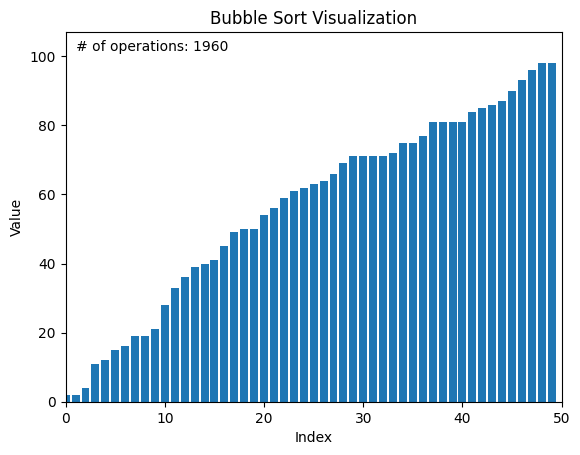

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# バブルソート
def bubble_sort(arr):
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
            yield arr


def visualize_bubble_sort(arr):
    # データの初期化
    data = arr
    sorter = bubble_sort(data)

    fig, ax = plt.subplots()
    ax.set_title('Bubble Sort Visualization')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

    bar_rects = ax.bar(range(len(data)), data, align='center')

    # 上限と下限を設定
    ax.set_xlim(0, len(data))
    ax.set_ylim(0, int(1.1*max(data)))

    text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

    iteration = [0] # 配列書き換えの副作用を利用（邪道）
    def update_fig(data, rects, iteration):
        for rect, val in zip(rects, data):
            rect.set_height(val)
        iteration[0] += 1
        text.set_text(f'# of operations: {iteration[0]}')

    anim = animation.FuncAnimation(fig, func=update_fig, fargs=(bar_rects, iteration),
                                   frames=sorter, repeat=False, interval=15, save_count=90000)
    anim.save('bubble_sort.mp4', writer="ffmpeg", fps=60)

    plt.show()


arr = np.random.randint(0, 100, 50)
visualize_bubble_sort(arr)


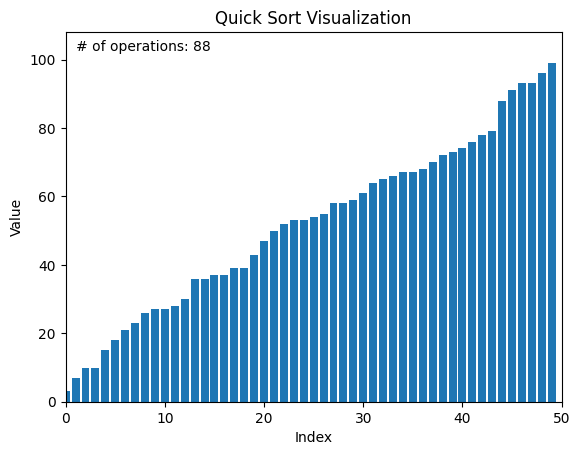

In [15]:
# クイックソート

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def quick_sort(arr, start, end, drawing_data):
    if start >= end:
        return

    pivot_index = partition(arr, start, end, drawing_data)
    quick_sort(arr, start, pivot_index, drawing_data)
    quick_sort(arr, pivot_index+1, end, drawing_data)

def partition(arr, start, end, drawing_data):
    pivot = arr[start]
    low = start + 1
    high = end - 1
    done = False
    while not done:
        while low <= high and arr[high] >= pivot:
            high = high - 1
        while low <= high and arr[low] <= pivot:
            low = low + 1
        if low <= high:
            arr[low], arr[high] = arr[high], arr[low]
            drawing_data.append(arr[:].copy())
        else:
            done = True
    arr[start], arr[high] = arr[high], arr[start]
    drawing_data.append(arr[:].copy())
    return high

def visualize_quick_sort(arr):
    fig, ax = plt.subplots()
    ax.set_title("Quick Sort Visualization")
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    bars = ax.bar(range(len(arr)), arr, align='center')
    # 上限と下限を設定
    ax.set_xlim(0, len(arr))
    ax.set_ylim(0, int(1.1*max(arr)))
    text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

    drawing_data = [arr[:]]

    quick_sort(arr, 0, len(arr), drawing_data)

    iteration = [0] # 配列書き換えの副作用を利用（邪道）
    def update_fig(arr, bars, iteration):
        for bar, val in zip(bars, arr):
            bar.set_height(val)
        iteration[0] += 1
        text.set_text(f'# of operations: {iteration[0]}')

    anim = animation.FuncAnimation(fig, update_fig, fargs=(bars, iteration),
                                   frames=drawing_data, repeat=False, interval=300)
    anim.save('quick_sort.mp4', writer="ffmpeg", fps=60)
    plt.show()

arr = np.random.randint(0, 100, 50)
visualize_quick_sort(arr)


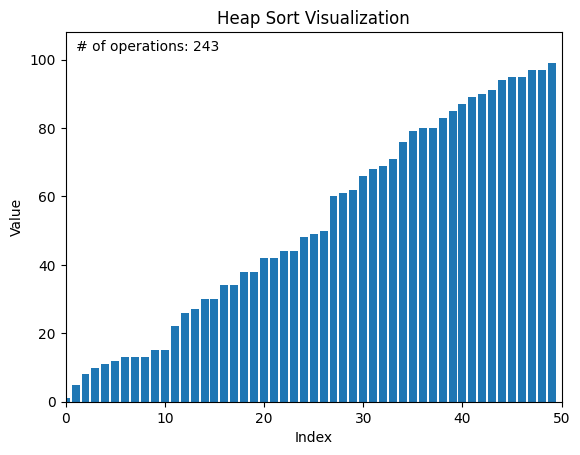

In [16]:
# ヒープソート

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def heapify(arr, n, i, drawing_data):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        drawing_data.append(arr[:].copy())
        heapify(arr, n, largest, drawing_data)

def heap_sort(arr, drawing_data):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i, drawing_data)

    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        drawing_data.append(arr[:].copy())
        heapify(arr, i, 0, drawing_data)

    return arr


def visualize_heap_sort(arr):
    fig, ax = plt.subplots()
    ax.set_title("Heap Sort Visualization")
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    bars = ax.bar(range(len(arr)), arr, align='center')
    # 上限と下限を設定
    ax.set_xlim(0, len(arr))
    ax.set_ylim(0, int(1.1*max(arr)))
    text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

    drawing_data = [arr[:]]

    heap_sort(arr, drawing_data)

    iteration = [0]
    def update_fig(arr, bars, iteration):
        for bar, val in zip(bars, arr):
            bar.set_height(val)
        iteration[0] += 1
        text.set_text(f'# of operations: {iteration[0]}')

    anim = animation.FuncAnimation(fig, update_fig, fargs=(bars, iteration),
                                   frames=drawing_data, repeat=False, interval=300)
    anim.save('heap_sort.mp4', writer="ffmpeg", fps=60)
    plt.show()

arr = np.random.randint(0, 100, 50)
visualize_heap_sort(arr)

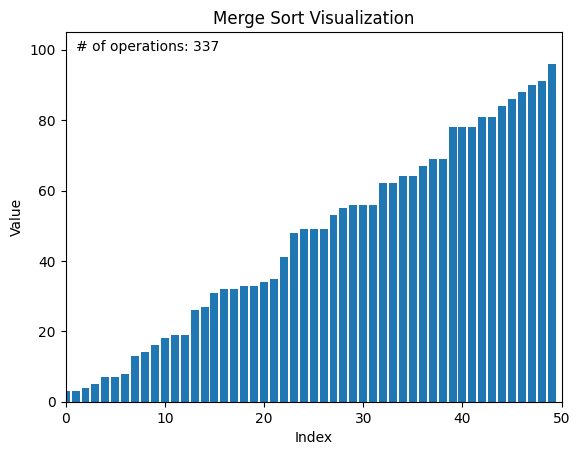

In [18]:
# マージソート

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def merge_sort(arr, low, high, drawing_data):
    if high - low <= 1:
        return arr

    mid = (low + high) // 2

    merge_sort(arr, low, mid, drawing_data)
    merge_sort(arr, mid, high, drawing_data)
    
    # マージ関数を呼び出す際にインデックスを渡します
    merge(arr, low, mid, high, drawing_data)

def merge(arr, low, mid, high, drawing_data):
    left = arr[low:mid]
    right = arr[mid:high]
    
    i = j = 0
    k = low
    
    temp = []
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            temp.append(left[i])
            i += 1
        else:
            temp.append(right[j])
            j += 1
        cat = (arr[:low], np.array(temp), arr[low+len(temp):])
        drawing_data.append(np.concatenate(cat))
        k += 1
        
    while i < len(left):
        temp.append(left[i])
        cat = (arr[:low], np.array(temp), arr[low+len(temp):])
        drawing_data.append(np.concatenate(cat))
        i += 1
        k += 1

    while j < len(right):
        temp.append(right[j])
        cat = (arr[:low], np.array(temp), arr[low+len(temp):])
        drawing_data.append(np.concatenate(cat))

        j += 1
        k += 1

    arr[low:high] = temp
    drawing_data.append(arr[:].copy())        

# アニメーションを作成・表示する関数
def visualize_merge_sort(arr):
    fig, ax = plt.subplots()
    ax.set_title("Merge Sort Visualization")
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    bars = ax.bar(range(len(arr)), arr, align='center')
    # 上限と下限を設定
    ax.set_xlim(0, len(arr))
    ax.set_ylim(0, int(1.1*max(arr)))
    text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

    drawing_data = [arr[:]]

    merge_sort(arr, 0, len(arr), drawing_data)

    iteration = [0]
    def update_fig(arr, bars, iteration):
        for bar, val in zip(bars, arr):
            bar.set_height(val)
        iteration[0] += 1
        text.set_text(f'# of operations: {iteration[0]}')

    anim = animation.FuncAnimation(fig, update_fig, fargs=(bars, iteration),
                                   frames=drawing_data, repeat=False, interval=300)
    anim.save(f'merge_sort.mp4', writer="ffmpeg", fps=60)
    plt.show()

arr = np.random.randint(0, 100, 50)
visualize_merge_sort(arr)

